# Subtargets

To analyze the SSCx circuit topologically, we want to compare columnar targets
distributed across the circuit's flatmap. Such columns are comparable to the
microcircuit columns that we have studied before. Becauseathe term *target* 
alreadt means a lot of things, we shall call such columnar targets as *subtargets*,
reserving the term *target* to name any group of cells.

In this study, we discuss the development of a tool to generate such subtargets.


In [492]:
#load tools to compose an article of analysis.

import os
import importlib
from importlib import reload
from pathlib import Path
import logging

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sbn

from scarpy.document import article

tessellate = importlib.import_module("tessellate")

LOG = logging.getLogger("Tessellate-2D with triangles.")
LOG.setLevel(os.environ.get("LOGLEVEL", "INFO"))


Lines along the v-axis that didn't fit the window: 21 / 36
	: [-18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Lines along the TriTille's y-axis that didn't fit the window: 25 / 36
	: [-18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Lines along the u-axis that didn't fit the window: 17 / 32
	: [-16, -15, -14, -13, -12, -11, -10, -9, -8, 8, 9, 10, 11, 12, 13, 14, 15]
Lines along the TriTille's x-axis that didn't fit the window: 32 / 32
	: [-16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

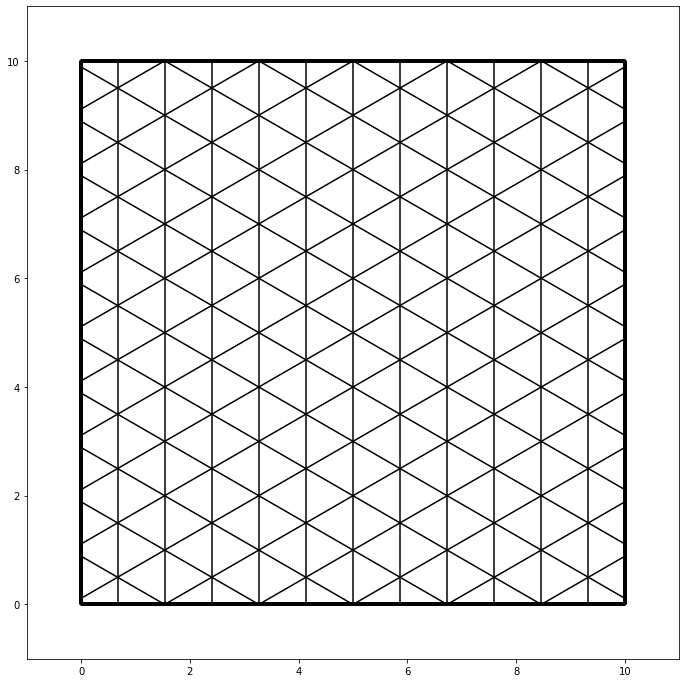

In [515]:
reload(tessellate)
tritille = tessellate.TriTille(1.,  origin=np.array([5., 5.]), angle=0.)

figure = plt.figure(figsize=(12,12))
axes = figure.add_subplot(111, aspect=1.)

tritille.display(10, origin=np.array([0., 0.]), hexgrid=True,
                 graphic=(figure, axes))
#graphic[0]


Lines along the v-axis that didn't fit the window: 25 / 36
	: [-18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Lines along the TriTille's y-axis that didn't fit the window: 21 / 36
	: [-18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Lines along the u-axis that didn't fit the window: 17 / 32
	: [-16, -15, -14, -13, -12, -11, -10, -9, -8, 8, 9, 10, 11, 12, 13, 14, 15]
Lines along the TriTille's x-axis that didn't fit the window: 19 / 32
	: [-16, -15, -14, -13, -12, -11, -10, -9, -8, -7, 7, 8, 9, 10, 11, 12, 13, 14, 15]


(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

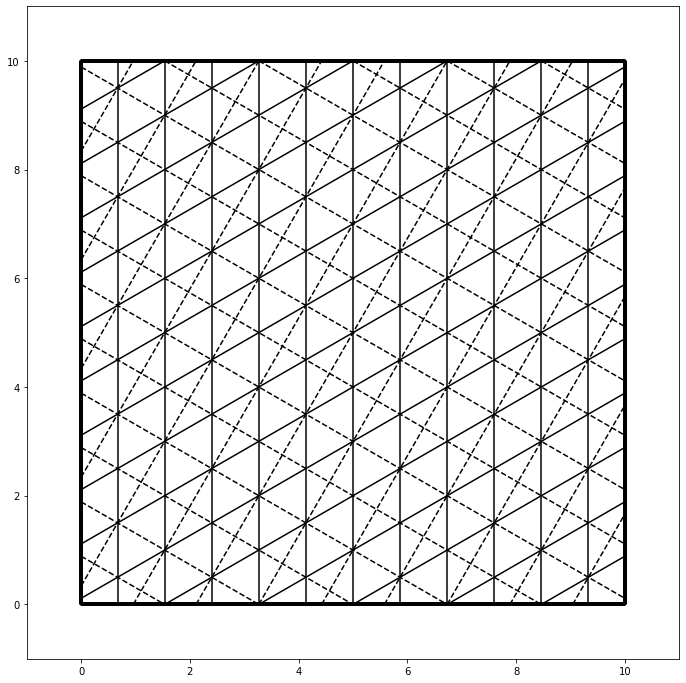

In [509]:
reload(tessellate)
tritille = tessellate.TriTille(1.,  origin=np.array([5., 5.]), angle=np.pi/3)

figure = plt.figure(figsize=(12,12))
axes = figure.add_subplot(111, aspect=1.)

tritille.display(10, origin=np.array([0., 0.]),
                 return_methods=False, graphic=(figure, axes))
#graphic[0]

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

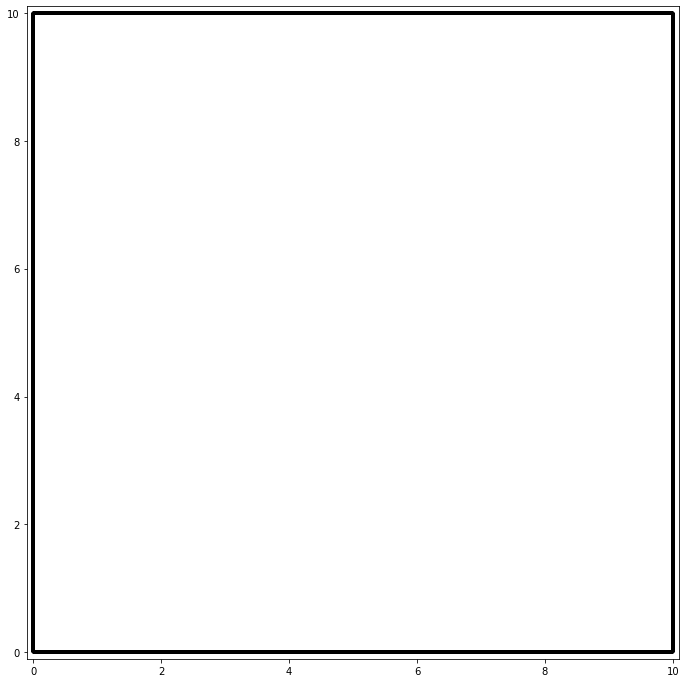

In [480]:
reload(tessellate)
tritille = tessellate.TriTille(1.,  origin=np.array([1., 1.]), angle=np.pi/2)

figure = plt.figure(figsize=(12,12))
axes = figure.add_subplot(111, aspect=1.)

graphic = (figure, axes)

draw = tritille.display(10, origin=np.array([0., 0.]),
                        return_methods=True, graphic=graphic)
draw_boundary = draw["draw_boundary"]
draw_line = draw["draw_line"]
draw_relxaxis = draw["draw_relxaxis"]
draw_relyaxis = draw["draw_relyaxis"]
draw_uaxis = draw["draw_uaxis"]
draw_vaxis = draw["draw_vaxis"]

draw_boundary(padding=0.1)


In [429]:
p_tt = tessellate.P(2 * tritille._side, 0)# * tritille._ratio / 2
print(p_tt)

p = tritille.unrotate(p_tt)
print(p)

p = tritille.untranslate(tritille.unrotate(p_tt))
print(p)

[2. 0.]
[1.2246468e-16 2.0000000e+00]
[1. 3.]


11


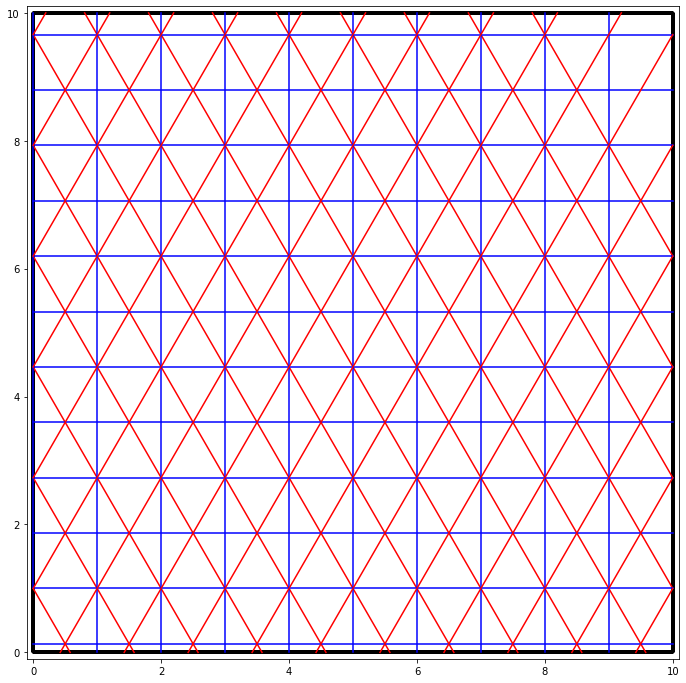

In [478]:
#graphic = draw_line(through=(0., 0.2), at_angle=np.pi/4., fmt="k-")
#graphic = draw_line(through=(0., 1.), at_angle=-np.pi/4, fmt="k-")

imax = 1 + int(10 / (tritille._side * tritille._ratio[0] / 2))
    
for i in range(-imax, imax):
    q = draw_relyaxis(i, fmt="b-")
    qq = draw_vaxis(i, fmt="r-")
    
jmax = 1 + int(10 / tritille._side)
print(jmax)
for j in range(-jmax, jmax):
    q = draw_relxaxis(j, fmt="b-")
    qq = draw_uaxis(j, fmt="r-")
    
graphic[0]

In [441]:
ttp = P(0, 0)
print(tritille.rotate(ttp))

[0. 0.]


In [351]:
rxa = draw_relxaxis(0)

print(np.tan(np.pi / 2.))
print(rxa._origin, rxa._angle / np.pi, rxa._slope)

print(rxa.y(0), np.inf)

1.633123935319537e+16
[1. 1.] 0.5 1.633123935319537e+16
-1.6331239353195368e+16 inf


[1.5 1.5]
plot line  1.0 2.0 to 2.0 0.9999999999999999


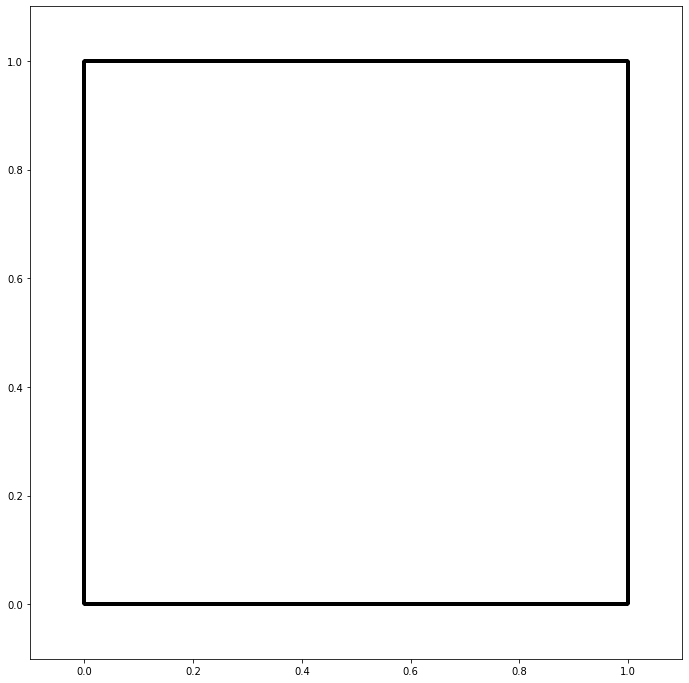

In [352]:
reload(tessellate)
Line = tessellate.Line
p00 = tritille._origin
p01 = p00 + np.array([1, 0])
p11 = p01 + np.array([0, 1])
p10 = p11 + np.array([-1, 0])
diagonal = Line.connecting(p01, p10, in_graphic=graphic)
print(diagonal._origin)
#tessellate.plot_segment(graphic, p01, p10, "k-")
#axes.plot([0., 1.], [diagonal.y(0), diagonal.y(1)], "b-")
diagonal.plot(x0=1.0, x1=2.0, fmt="r-")

#antidiag = Line.connecting(p00, p11, in_graphic=graphic)
#antidiag.plot(x0=1., x1=2.0, fmt="r-")

#horizcenter = tessellate.Line(np.array([0., 0.5]), 0.)
#axes.plot([0., 1.], [horizcenter.y(0), horizcenter.y(1)], "k-")

#verticenter = tessellate.Line(np.array([0.5, 0.]), np.inf)
#axes.plot([0.5, 0.5], [0., 1.], "k-")
graphic[0]

In [353]:
graphic = draw_vaxis(-1)
graphic

vaxis  -1  through point 0 0 2.6320508075688784 ?


In [293]:
q = np.array([("x", 1), ("y", 1)], dtype=[("name", "U1"), ("value", "i4")])
print(q)
qq = np.array([(0, 1), (1, 2)], dtype=[("x", float), ("y", float)])
print(qq.shape, qq[0], qq[1], qq["x"], qq["y"])

[('x', 1) ('y', 1)]
(2,) (0., 1.) (1., 2.) [0. 1.] [1. 2.]


In [106]:
vaxis = tessellate.Line(tritille._origin + np.array([0., - 1 * tritille._side]),
                        at_angle=tritille._angle + np.pi / 6.)
vaxis._origin, vaxis._angle

(array([  0., -20.]), 2.0943951023931953)

In [109]:
figure = plt.figure(figsize=(12, 12))
axes = 
vaxis.x(0), vaxis.y(0)

(-11.54700538379251, -20.0)

<Figure size 864x864 with 0 Axes>

In [80]:
graphic = draw_vaxis(9)

draw v-axis  9
too high 170.0 120
too high fixed 110.0 120
too wide 301.7691453623979 120


draw v-axis  0
draw v-axis  1
draw v-axis  2
draw v-axis  3
draw v-axis  4
too wide 138.56406460551017 120
draw v-axis  5
too wide 173.20508075688772 120
draw v-axis  6
too wide 207.84609690826525 120
draw v-axis  7
too high 140.0 120
too high fixed 120.0 120
too wide 242.4871130596428 120
draw v-axis  8
too high 160.0 120
too high fixed 120.0 120
too wide 277.12812921102034 120
draw v-axis  9
too high 180.0 120
too high fixed 120.0 120
too wide 311.7691453623979 120
draw v-axis  10
too high 200.0 120
too high fixed 120.0 120
too wide 346.41016151377545 120
draw v-axis  11
too high 220.0 120
too high fixed 120.0 120
too wide 381.051177665153 120


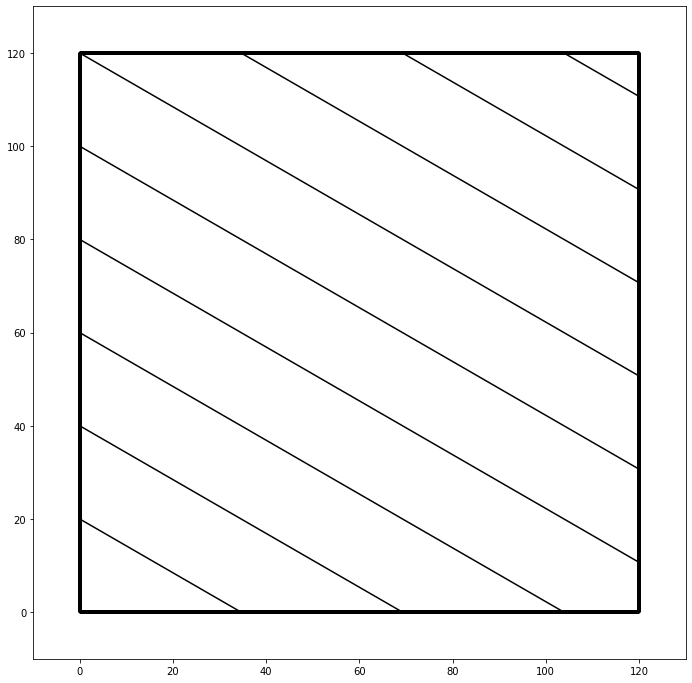

In [61]:
reload(tessellate)
tritille = tessellate.TriTille(20)

figure = plt.figure(figsize=(12,12))
axes = figure.add_subplot(111, aspect=1.)

graphic = tritille.display(120, return_methods=False, graphic=(figure, axes))

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

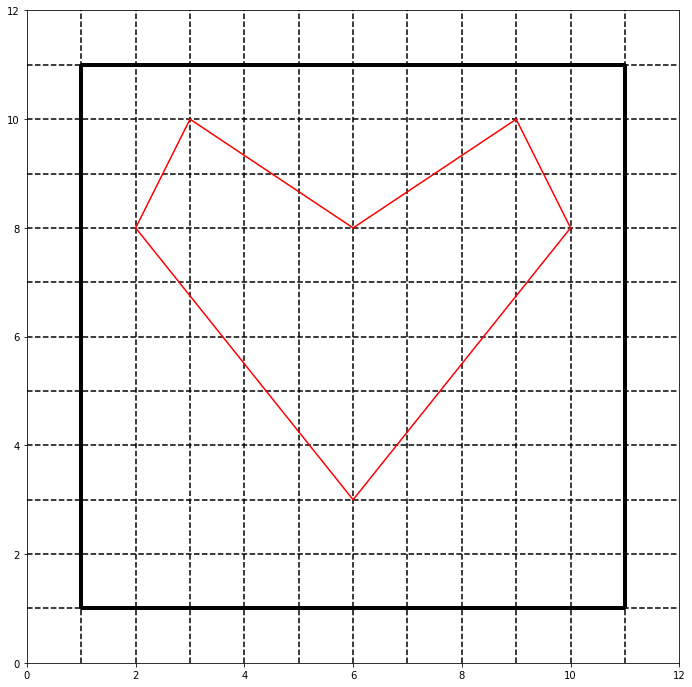

In [240]:
reload(tessellate); Line = tessellate.Line

tritille = tessellate.TriTille(1,  origin=np.array([1., 1.]), angle=np.pi/2)

figure = plt.figure(figsize=(12,12))
axes = figure.add_subplot(111, aspect=1.)

draw = tritille.display(10, origin=np.array([1., 1.]),
                        return_methods=True, graphic=(figure, axes))
draw_boundary = draw["draw_boundary"]
draw_uaxis = draw["draw_uaxis"]
draw_vaxis = draw["draw_vaxis"]

graphic = draw_boundary(padding=1)

for i in range(1, 12):
    axes.plot([i, i], [0, 12], "k--")
    axes.plot([0, 12], [i, i], "k--")
    
center = np.array((6, 8))
move_left = np.array((-3, +2))
move_right = np.array((+3, +2))
move_bottom = np.array((0, -5))

left_up = center + move_left
left_down = left_up + (-1, -2)

tessellate.plot_segment(graphic, center, left_up, "r-")
tessellate.plot_segment(graphic, left_up, left_down, "r-")

bottom = center + move_bottom
tessellate.plot_segment(graphic, left_down, bottom, "r-")

right_up = center + move_right
right_down = right_up + (1, -2)

tessellate.plot_segment(graphic, bottom, right_down, "r-")

tessellate.plot_segment(graphic, right_down, right_up, "r-")

tessellate.plot_segment(graphic, right_up, center, "r-")